In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("../dataset/final.csv")
X_scaled = df.values

In [ ]:
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_p_sub = X_pca[:, 1:10]

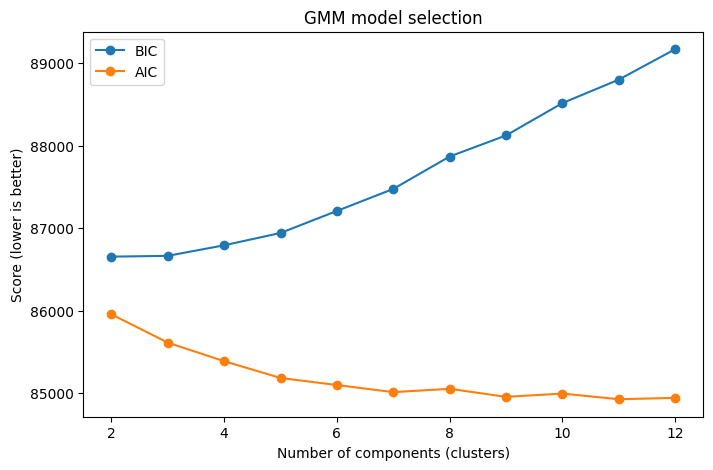

Best number of clusters by BIC: 2


In [ ]:
X_model = X_p_sub   # or X_scaled if you skipped PCA

ks = range(2, 13)   # try 2–12 clusters
bics = []
aics = []

for k in ks:
    gmm_k = GaussianMixture(
        n_components=k,
        covariance_type='full',
        random_state=42,
        n_init=5
    )
    gmm_k.fit(X_model)
    bics.append(gmm_k.bic(X_model))
    aics.append(gmm_k.aic(X_model))

# Plot BIC/AIC to see the elbow
plt.figure(figsize=(8, 5))
plt.plot(ks, bics, marker='o', label='BIC')
plt.plot(ks, aics, marker='o', label='AIC')
plt.xlabel("Number of components (clusters)")
plt.ylabel("Score (lower is better)")
plt.title("GMM model selection")
plt.legend()
plt.show()

# Choose best k by minimum BIC
best_k = ks[int(np.argmin(bics))]
print("Best number of clusters by BIC:", best_k)

best_gmm = GaussianMixture(
    n_components=best_k,
    covariance_type='full',
    random_state=42,
    n_init=5
)
best_labels = best_gmm.fit_predict(X_model)
df['gmm_cluster'] = best_labels

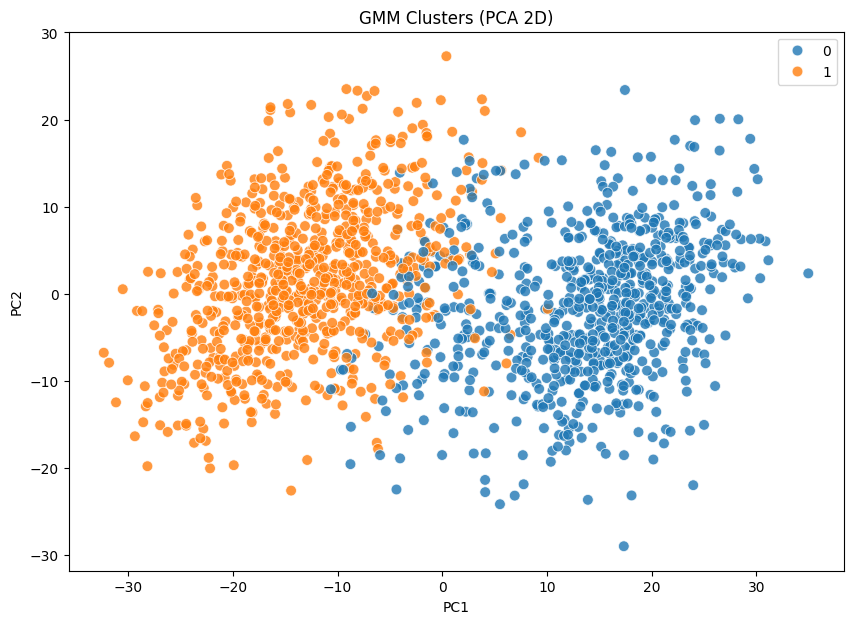

In [ ]:
plot_df = pd.DataFrame({
    'PC1': X_p_sub[:, 0],
    'PC2': X_p_sub[:, 1],
    'cluster': df['gmm_cluster']
})

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    s=60,
    alpha=0.8
)
plt.title("GMM Clusters (PCA 2D)")
plt.legend()
plt.show()

In [12]:
df.columns

Index(['Height', 'Weight', 'Age', 'Acc', 'Aer', 'Agg', 'Agi', 'Ant', 'Bal',
       'Bra', 'Cmd', 'Com', 'Cmp', 'Cnt', 'Cor', 'Cro', 'Dec', 'Det', 'Dri',
       'Ecc', 'Fin', 'Fir', 'Fla', 'Fre', 'Han', 'Hea', 'Jum', 'Kic', 'Ldr',
       'Lon', 'L_Th', 'Mar', 'Nat_.1', 'OtB', '1v1', 'Pac', 'Pas', 'Pen',
       'Pos', 'Pun', 'Ref', 'TRO', 'Sta', 'Str', 'Tck', 'Tea', 'Tec', 'Thr',
       'Vis', 'Wor', 'Foot_Total_Strength', 'Preferred_Foot_Num',
       'gmm_cluster'],
      dtype='object')